<a href="https://colab.research.google.com/github/Liang130520/Deep_Learning/blob/main/DeepLearning_1110_7_epochs_%2B_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
" 圖像處理 mlp "
# 令 28*28 圖像共 784 pixel, p1, p2, ......, p783, p784
# 輸出層:分為10個類別值, 各類別是零的機率, P1, P2, ......, P9, P10, 其中每個皆用 Sigmoid 判斷, 利用正確答案調整輸出層的樣態, 取得何類別為 0 / 1
# 中間層:隨心控制層數及個數, 可考慮輸出層10倍往前不斷估算, but 問題困難, 資料過少, 易造成學不會, or 問題簡單, 資料太多, 易造成過擬合

' 圖像處理 mlp '

In [75]:
# tensorflow 2 -> tensorflow + leras
# tensorflow 2 -> 不須特別安裝 gpu 版, 只要你安裝 cuda + cudnn, 自動執行

from tensorflow.keras.datasets.mnist import load_data
# (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data()

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


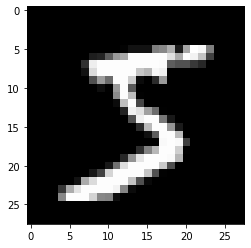

In [77]:
# 只要看到matplotlib有cmap參數
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 如果你要反過來, _r PiYG->PiYG_r
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [78]:
""" tensorflow 模型 """

" Dense "
# 1. 地基(model): sequential(一層疊一層), Model(自由)
# 2. 層(layer): Dense(全連接層) -> 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# tf.keras.layers.Dense(units, activation = None)
# 僅須注意 units 及 activation, units 為幾個格子, activation 為 loss 計算方式

# 中間層一律採用"relu", 輸出層採用"sigmoid"
layers = [
    Dense(128, activation = "relu", input_dim = 784),
    Dense(10, activation = "sigmoid")
]
model = Sequential(layers)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [79]:
" Softmax "

# all sigmoid 相加後 機率 為1 --> sigmoid = 1 / (1 + e ** -x), 但天花板為1, 即與天花板相等, 無須再設定天花板, 故 sigmoid = e ** x
# softmax: 因為每個機率互斥, 可視為 normalize 的 Sigmoid, 有兩種做法, 1. Sig / (all Sigmoid) 2. (e ** n) / (all e ** n)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# tf.keras.layers.Dense(units, activation = None)
# 僅須注意 units 及 activation, units 為幾個格子, activation 為 loss 計算方式

# 中間層一律採用"relu", 輸出層採用"sigmoid", 
layers = [
    # 784 * 128 + 128 * 1(bias) = 100480
    Dense(128, activation = "relu", input_dim = 784),
    # 128 * 10 + 10 * 1(bias) = 1290
    Dense(10, activation = "softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [80]:
"""
重點

激活:
1. 中間層: 用relu
2. 輸出層: 看每個格子機率互斥與否
    1. sigmoid: 不互斥用
    2. softmax: 互斥用
"""

'\n重點\n\n激活:\n1. 中間層: 用relu\n2. 輸出層: 看每個格子機率互斥與否\n    1. sigmoid: 不互斥用\n    2. softmax: 互斥用\n'

In [81]:
" bias(偏移) "
# 每個機率都有各自的 threshold, 要統一規格, 可在原格子扣除該th
# 每一個的扣除, 都需要一個 bias 去平衡, bias的係數為 th[-(bloss / bth)]
# --> 1 out : 128 + 1 bias
# 乃是為了統一規格, 每有一個輸出, 即須一個 bias

"""
重點

"""

'\n重點\n\n'

In [82]:
" Entropy(熵) "
# MSE 缺點: 機率上限為 1, 而 MSE 為拋物線, 斜率大, 邁出的步數不夠大, 故浪費時間
# if 只有 1 點, MSE 距離算法: d1(1 - d1) + d2(1 - d2) 
# 因為 MSE 移動幅度小, 同步放大, 而能最快放大的為指數函數, 取 -無限 ~ 0, 即可收斂
# -> 同乘 log, d1 * (log1 - logd1) + d2 * (log1 - logd2)
# --> d1 * log(1 / di) + d2 * log(1 / d2) 
# ==> all [pi * log(1/pi)]

' Entropy(熵) '

In [83]:
" Cross (交叉預測) "
# 真實分布: P1, P2
# 目前預測: Q1, Q2
# 因不確定預測的位置, 以交叉猜測 來推估預測值
# Cross Gini: P1(1-Q1) + P2(1-Q2)  v.s. Gini: p1(1-p1) + p2(1-p2)
# Cross Entropy: P1 * log(1/Q1) + P2 * log(1/Q2)  v.s. Entropy: p1 * log(1/p1) + p2 * log(1/p2)
# Loss & MSE 特性: 預測 跟 正確 之間具備最小值
# -> if 參考 Loss 特性, Cross Gini 只會取得某預測值為1, 另預測值為1的情況
# -> 而 Cross Entropy 不會出現某預測值為 0, 且 if P1 = Q1, P2 = Q2, 恰好滿足 Loss 要求

# 如果最後輸出:
# 1 個神經元: BinaryCrossEntropy p * log(1/q) + (1-p) * log(1/(1-q))
# 多個神經元: CategoricalCrossEntropy pi * log(1 / qi)

from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss = CategoricalCrossentropy(), 
              optimizer = "adam",
              metrics = "accuracy")

In [84]:
""" 無法確定為全圖最低, 為避免遇到低窪, 非相對佳的低谷, 有以下方式, 皆統稱 adam """

" 動量優化 "
# 小彈珠移動 動能,位能的互相轉換概念, m現' = m現 + [摩擦力(通常<1) * m前]
" 時間優化 "
# 碗公概念, when time 小: 步數常數 大, when t 大: 步數常數 小

' 時間優化 '

In [85]:
# y 做 one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [86]:
" tensorflow 的隨機數需要人為設定, "
# x 攤平(28 * 28 -> 784), Scaling to 0-1(配合tensorflow)
# reshape: 可以某個位置設置 -1, 讓程式自行計算
# x_train有60000筆資料
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [87]:
import numpy as np
n = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])
n.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [88]:
# batch_size: 一次看多少筆資料, 把其中所有筆的斜率做平均, 再調整
# 圖片小(不影響ram): 100 - 200, 圖片大(吃很多ram): 10 - 20
# if 60000筆, 每200筆調整一次 -> 共300次調整
# epochs: 決定整份資料打算看過幾遍 (當覺得模型訓練完畢就停止)
# validation_split: 切出一部份資料做模型確認(原檔案不傳入訓練資料的資料)
# epochs + validation: 何時該停 (val_loss平滑時就該停下)
# epochs: 60000筆(90%) -> 54000 / 200 --> 調整270次
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only = True),
    EarlyStopping(patience = 5, restore_best_weights = True)]
model.fit(x_train_norm,
          y_train_cat,
          batch_size = 200,
          epochs = 50,
          validation_split = 0.1,
          callbacks = callbacks,
          verbose = 2)

Epoch 1/50
270/270 - 2s - loss: 0.4424 - accuracy: 0.8796 - val_loss: 0.1889 - val_accuracy: 0.9483 - 2s/epoch - 8ms/step
Epoch 2/50
270/270 - 2s - loss: 0.2030 - accuracy: 0.9423 - val_loss: 0.1408 - val_accuracy: 0.9612 - 2s/epoch - 7ms/step
Epoch 3/50
270/270 - 2s - loss: 0.1532 - accuracy: 0.9565 - val_loss: 0.1165 - val_accuracy: 0.9682 - 2s/epoch - 9ms/step
Epoch 4/50
270/270 - 2s - loss: 0.1216 - accuracy: 0.9648 - val_loss: 0.1129 - val_accuracy: 0.9677 - 2s/epoch - 8ms/step
Epoch 5/50
270/270 - 2s - loss: 0.0996 - accuracy: 0.9716 - val_loss: 0.0956 - val_accuracy: 0.9718 - 2s/epoch - 8ms/step
Epoch 6/50
270/270 - 1s - loss: 0.0828 - accuracy: 0.9765 - val_loss: 0.0887 - val_accuracy: 0.9753 - 1s/epoch - 5ms/step
Epoch 7/50
270/270 - 1s - loss: 0.0706 - accuracy: 0.9801 - val_loss: 0.0856 - val_accuracy: 0.9758 - 1s/epoch - 5ms/step
Epoch 8/50
270/270 - 1s - loss: 0.0608 - accuracy: 0.9827 - val_loss: 0.0803 - val_accuracy: 0.9758 - 1s/epoch - 5ms/step
Epoch 9/50
270/270 - 1s 

In [89]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9768


[0.07180951535701752, 0.9768000245094299]